Model Training 

In [1]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load cleaned dataset to the dataframe 
diabetes_df = pd.read_csv('data\diabetes_cleaned.csv')

In [3]:
diabetes_df.head(10)

,Unnamed: 0,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0,9.0,4.0,3.0,0
1,1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0,7.0,6.0,1.0,0
2,2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0,9.0,4.0,8.0,0
3,3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0,11.0,3.0,6.0,0
4,4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0,11.0,5.0,4.0,0
5,5,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,1,10.0,6.0,8.0,0
6,6,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,14.0,0.0,0,9.0,6.0,7.0,0
7,7,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,3.0,0.0,0.0,1.0,0,11.0,4.0,4.0,0
8,8,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,0.0,5.0,30.0,30.0,1.0,0,9.0,5.0,1.0,1
9,9,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1,8.0,4.0,3.0,0


In [4]:
# drop unnamed column

diabetes_df = diabetes_df.drop(columns=['Unnamed: 0'])

In [5]:
diabetes_df.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0,9.0,4.0,3.0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0,7.0,6.0,1.0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0,9.0,4.0,8.0,0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0,11.0,3.0,6.0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0,11.0,5.0,4.0,0
5,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,1,10.0,6.0,8.0,0
6,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,14.0,0.0,0,9.0,6.0,7.0,0
7,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,0.0,1.0,0,11.0,4.0,4.0,0
8,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,5.0,30.0,30.0,1.0,0,9.0,5.0,1.0,1
9,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1,8.0,4.0,3.0,0


In [6]:
# transform the dataset to X, y segments

X = diabetes_df.drop(columns=['Diabetes_binary'])
y = diabetes_df['Diabetes_binary']

In [7]:
# split the dataset to test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The number of instances for training: ", len(X_train))
print("The number of instances for test: ", len(X_test))

The number of instances for training:  311003
The number of instances for test:  77751


In [13]:
# create a map of all the classes 0 no diabetes, 1 Diabetes or Pre-diabetes suspected
map_class = {0 : 'No Diabetes', 1: 'Diabetes Suspected'}

In [8]:
# Create objects foreach of the classifiers
xgb = XGBClassifier()
decision_tree = DecisionTreeClassifier(max_depth=30)
random_classifier = RandomForestClassifier(n_estimators=50, random_state=2, max_depth=25)
multinb = MultinomialNB()
bernoulnb = BernoulliNB()
light = LGBMClassifier()
cat = CatBoostClassifier()



In [9]:
# create a function to train the model and return performance metrics

def train_model(model, X_train, X_test, y_train, y_test):

    # train the model
    model.fit(X_train, y_train)

    # evaluate the trained model
    y_pred = model.predict(X_test) 
    # evaluation metrics
    acc = accuracy_score(y_pred, y_test)
    prec = precision_score(y_pred, y_test)
    rec = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    conf = confusion_matrix(y_pred, y_test)

    return acc, prec, rec, f1, conf

Model: XGBOOST:
Accuracy: 0.908194106828208
Precision: 0.8450065686097731
Recall score: 0.9669565217391304
f1 score 0.9018777664751326
Confusion Matrix [[37809  6017]
 [ 1121 32804]]


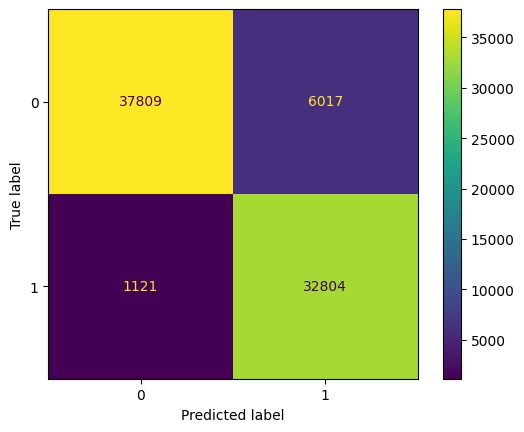

Model: Decision Tree:
Accuracy: 0.8607349101619272
Precision: 0.8685762860307565
Recall score: 0.8548358473824312
f1 score 0.8616512917486521
Confusion Matrix [[33204  5102]
 [ 5726 33719]]


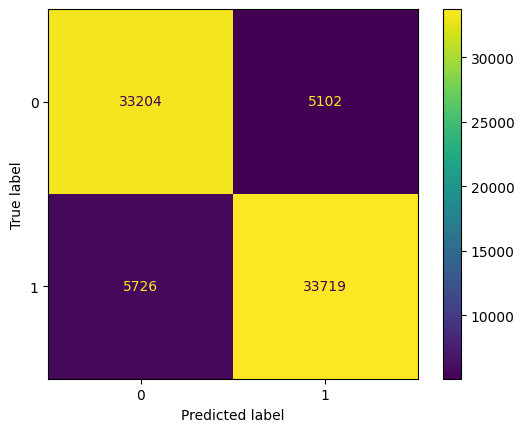

Model: Random Forest:
Accuracy: 0.9062905943331918
Precision: 0.8694005821591406
Recall score: 0.9383879667472962
f1 score 0.9025779536824089
Confusion Matrix [[36714  5070]
 [ 2216 33751]]


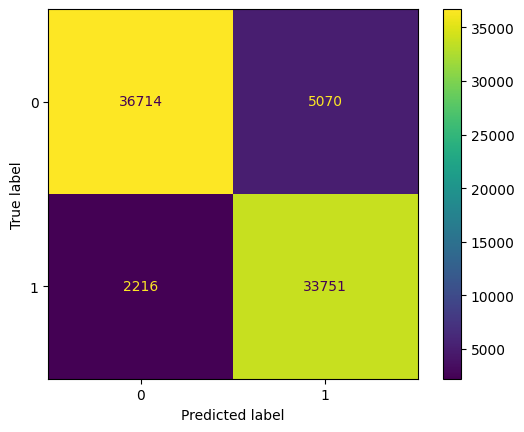

Model: Multinomial Naive Bayes:
Accuracy: 0.5969698138930689
Precision: 0.3912830684423379
Recall score: 0.6634636383489845
f1 score 0.4922548447728304
Confusion Matrix [[31225 23631]
 [ 7705 15190]]


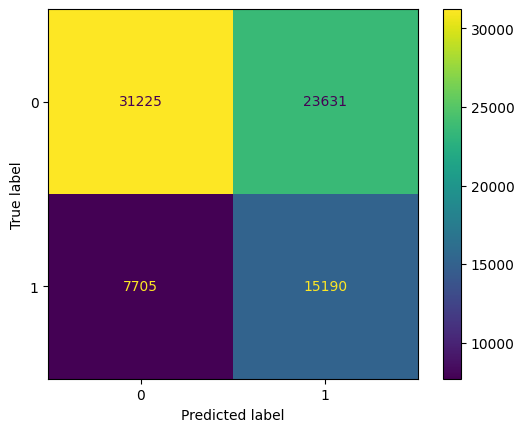

Model: Bernoulli Naive Bayes:
Accuracy: 0.7555658448122854
Precision: 0.7644831405682492
Recall score: 0.750581689428427
f1 score 0.7574686387361059
Confusion Matrix [[29068  9143]
 [ 9862 29678]]


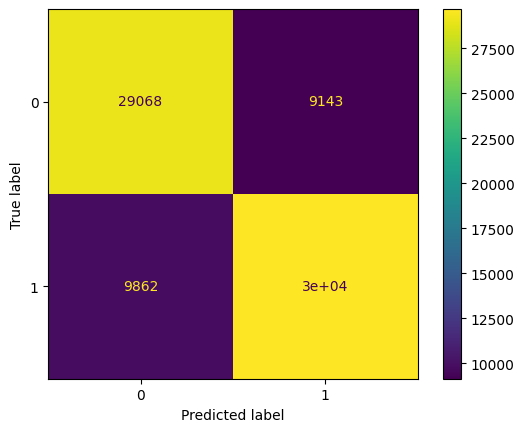

[LightGBM] [Info] Number of positive: 155556, number of negative: 155447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5102
[LightGBM] [Info] Number of data points in the train set: 311003, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500175 -> initscore=0.000701
[LightGBM] [Info] Start training from score 0.000701
Model: Light GBM:
Accuracy: 0.9071008733006649
Precision: 0.8474536977409134
Recall score: 0.9619590643274853
f1 score 0.9010832500239657
Confusion Matrix [[37629  5922]
 [ 1301 32899]]


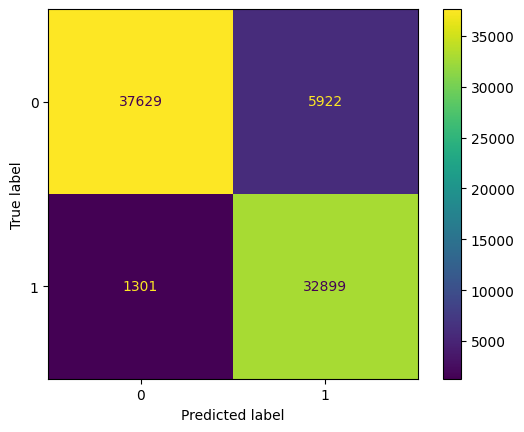

Learning rate set to 0.119494
0:	learn: 0.5849377	total: 240ms	remaining: 3m 59s
1:	learn: 0.5286566	total: 317ms	remaining: 2m 37s
2:	learn: 0.4918001	total: 398ms	remaining: 2m 12s
3:	learn: 0.4670240	total: 500ms	remaining: 2m 4s
4:	learn: 0.4311895	total: 596ms	remaining: 1m 58s
5:	learn: 0.4165428	total: 669ms	remaining: 1m 50s
6:	learn: 0.4024607	total: 745ms	remaining: 1m 45s
7:	learn: 0.3775167	total: 827ms	remaining: 1m 42s
8:	learn: 0.3607786	total: 895ms	remaining: 1m 38s
9:	learn: 0.3511029	total: 986ms	remaining: 1m 37s
10:	learn: 0.3418130	total: 1.08s	remaining: 1m 37s
11:	learn: 0.3261247	total: 1.16s	remaining: 1m 35s
12:	learn: 0.3110632	total: 1.25s	remaining: 1m 35s
13:	learn: 0.3056213	total: 1.33s	remaining: 1m 33s
14:	learn: 0.3010318	total: 1.43s	remaining: 1m 33s
15:	learn: 0.2969578	total: 1.53s	remaining: 1m 34s
16:	learn: 0.2933736	total: 1.65s	remaining: 1m 35s
17:	learn: 0.2868145	total: 1.75s	remaining: 1m 35s
18:	learn: 0.2816799	total: 1.86s	remaining: 

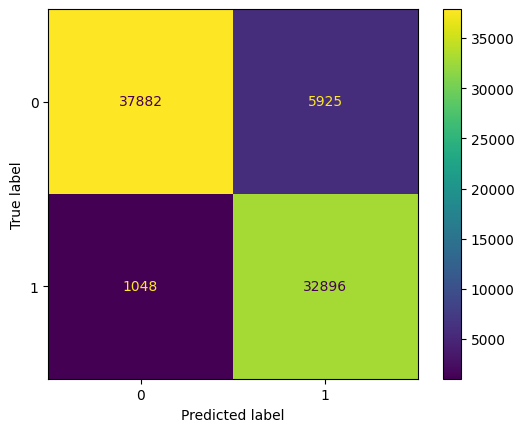

In [14]:
# dictionary to hodl the models

models = {
    'XGBOOST:' : xgb,
    'Decision Tree:' : decision_tree,
    'Random Forest:' : random_classifier,
    'Multinomial Naive Bayes:': multinb,
    'Bernoulli Naive Bayes:' : bernoulnb,
    'Light GBM:' : light,
    'CatBoost:' : cat

}

# list of the performance metrics

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusions = []

# for loop to iterate through models

for model_name, model in models.items():
    acc_score, prec_score, rec_score, f_1, confusions_score = train_model(model, X_train, X_test, y_train, y_test)

    print('Model:', model_name)
    print('Accuracy:', acc_score)
    print('Precision:', prec_score)
    print('Recall score:', rec_score)
    print('f1 score', f_1)
    print('Confusion Matrix', confusions_score)
    disp = ConfusionMatrixDisplay(confusions_score, display_labels= map_class.keys())
    disp.plot()
    plt.show()

    print('='* 50)
    
    # append the perfromance metrics to a list
    accuracy_scores.append(acc_score)
    precision_scores.append(prec_score)
    recall_scores.append(rec_score) 
    f1_scores.append(f_1)
    confusions.append(confusions_score)

In [18]:
# dataframe of all the performance metrics

performance_df = pd.DataFrame({
    'Algorithm': models.keys(),
    'Accuracy' : accuracy_scores,
    'Precision' : precision_scores,
    'Recall Score' : recall_scores,
     'f1 Score' : f1_scores,
     'confusion Matrix' : confusions
}).sort_values("Accuracy", ascending= False, ignore_index=True)

performance_df

,Algorithm,Accuracy,Precision,Recall Score,f1 Score,confusion Matrix
0,CatBoost:,0.910316,0.847376,0.969126,0.904171,"[[37882, 5925], [1048, 32896]]"
1,XGBOOST:,0.908194,0.845007,0.966957,0.901878,"[[37809, 6017], [1121, 32804]]"
2,Light GBM:,0.907101,0.847454,0.961959,0.901083,"[[37629, 5922], [1301, 32899]]"
3,Random Forest:,0.906291,0.869401,0.938388,0.902578,"[[36714, 5070], [2216, 33751]]"
4,Decision Tree:,0.860735,0.868576,0.854836,0.861651,"[[33204, 5102], [5726, 33719]]"
5,Bernoulli Naive Bayes:,0.755566,0.764483,0.750582,0.757469,"[[29068, 9143], [9862, 29678]]"
6,Multinomial Naive Bayes:,0.596970,0.391283,0.663464,0.492255,"[[31225, 23631], [7705, 15190]]"


In [28]:
import pickle
file_name = "cat_boost.pickle"
pickle.dump(cat, open(file_name, 'wb'))